## Observations

* Rural city_type has the highest average fare, but also the lowest driver count and the lowest total rides per city
* Urban city_type has the lowest average fare, but also the highest driver count and highest total rides per city
* Suburban city_type has median average fare, and also median driver coount with median total rides per city

* Suburban city_type is where it's at:
  * 30.5% of the overall revenue, with just 16.5% of all the drivers, with 26.3% of the total rides across all city_types

In [411]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Files to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
df_city = pd.read_csv(city_data_to_load)#.set_index('city')
df_ride = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
df = pd.merge(df_city, df_ride, how="inner", on=["city", "city"])

# Display the data table for preview
df = df[['city', 'date', 'fare', 'ride_id', 'driver_count', 'type']]
df[df.ride_id.isin([5739410935873, 2343912425577, 2005065760003, 5149245426178, 3908451377344])]


,city,date,fare,ride_id,driver_count,type
70,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
709,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban
1210,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
1375,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1576,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [412]:
"""
Function to get the color based on  the city_type

param1: city_type: valid values are ['Urban', 'Suburban', 'Rural']

returns: color: valid values are ['lightcoral', 'lightskyblue', 'yellow']
"""
def get_color(city_type):
    if city_type == 'Urban':
        color = 'lightcoral'
    elif city_type == 'Suburban':
        color = 'lightskyblue'
    elif city_type == 'Rural':
        color = 'gold'
    return color

In [413]:
"""
Function to obtain the x and y coordinates for each of the three city types
and also gets the sizes and colors of each bubble / circle in the plot

param1: df: the data frame
param2: city_type: valid values are ['Urban', 'Suburban', 'Rural']

returns:
x_axis: Total Number of Rides (Per City)
y_axis: Average Fare ($)
s_sizes: Circle size correlates with driver count per city
color: valid values are ['lightcoral', 'lightskyblue', 'yellow']
"""
def get_plot_param_values(df, city_type):
    x_axis = data1[data1.city_type == city_type].total_number_of_rides_per_city
    y_axis = data1[data1.city_type == city_type].average_fare_by_city
    s_sizes = data1[data1.city_type == city_type].driver_count*10
    color = get_color(city_type)
    return x_axis, y_axis, s_sizes, color

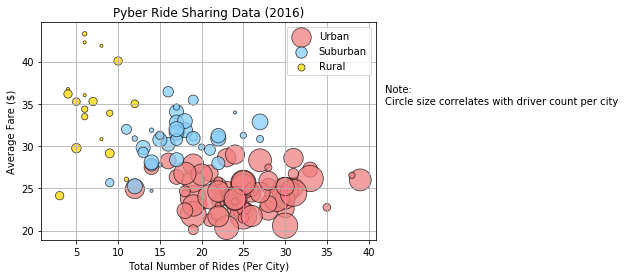

In [414]:
#prep data
data = df.groupby('city').agg({'city': 'count'
                               , 'fare': 'mean'}).rename(columns={'city': 'total_number_of_rides_per_city'
                                                                  , 'fare': 'average_fare_by_city'}).reset_index().set_index('city')
data1 = pd.merge(df_city, data, how="inner", on=["city", "city"]).rename(columns={"type": "city_type"})

#enumerate thru the 3 city types
for i, city_type in enumerate(data1.city_type.unique()):
    x_axis, y_axis, s_sizes, color = get_plot_param_values(data1, city_type)
    # Build the scatter plots for each city types
    plt.scatter(x_axis, y_axis, c=color, s=s_sizes, alpha=.75, edgecolors='black', linewidths=.75)

# Create a legend
plt.legend(labels=data1.city_type.unique(), loc='upper right')

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Incorporate a text label regarding circle size
plt.text(x=42, y=35, s='Note: \nCircle size correlates with driver count per city')

# Save Figure
plt.savefig("../Images/pyber_bubble.png")

# Show plot
plt.show()

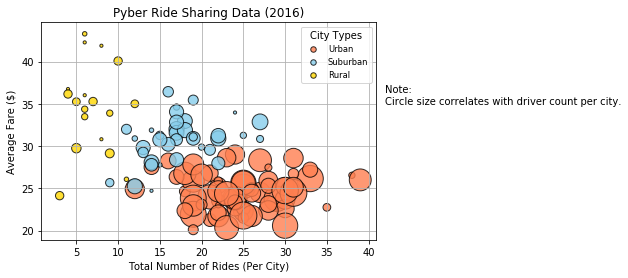

## Total Fares by City Type

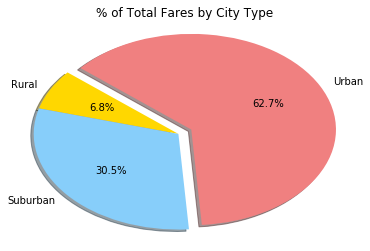

In [415]:
# Calculate Type Percents
fares_by_city_type = df.groupby('type').agg({'fare': 'sum'})#.reset_index()
explode = (0, 0, 0.1)

# get the colors for each city_type and add that to the data frame
colors = {city_type: [get_color(city_type)] for i, city_type in enumerate(data1.city_type.unique())}
df_colors = pd.DataFrame(colors).T.reset_index().rename(columns={'index': 'type', 0: 'color'})
fares_by_city_type1 = pd.merge(fares_by_city_type, df_colors, how='inner', on=['type', 'type'])

# Build Pie Chart
plt.pie(fares_by_city_type1.fare, explode=explode, labels=fares_by_city_type1.type, colors=fares_by_city_type1.color,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis('auto')
plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig("../Images/pyber_pie_fares.png")

# Show Figure
plt.show()

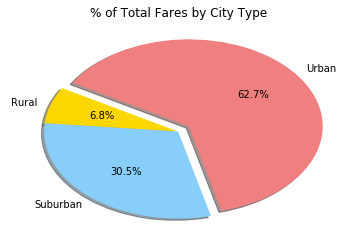

## Total Rides by City Type

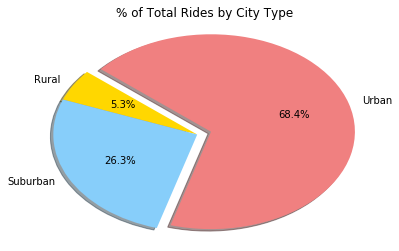

In [416]:
# Calculate Ride Percents
rides_by_city_type = df.groupby('type').agg({'ride_id': 'count'})
rides_by_city_type1 = pd.merge(rides_by_city_type, df_colors, how='inner', on=['type', 'type'])

# Build Pie Chart
plt.pie(rides_by_city_type1.ride_id, explode=explode, labels=rides_by_city_type1.type, colors=rides_by_city_type1.color,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis('auto')
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig("../Images/pyber_pie_rides.png")

# Show Figure
plt.show()

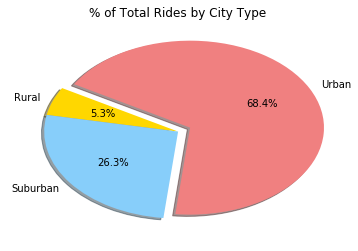

## Total Drivers by City Type

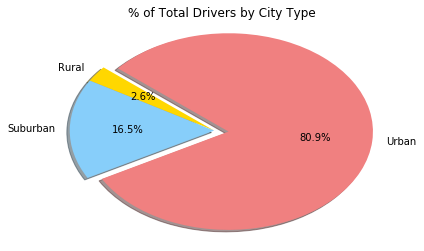

In [417]:
# Calculate Driver Percents
drivers_by_city_type = df_city.groupby('type').agg({'driver_count': 'sum'})
drivers_by_city_type1 = pd.merge(drivers_by_city_type, df_colors, how='inner', on=['type', 'type'])

# Build Pie Chart
plt.pie(drivers_by_city_type1.driver_count, explode=explode, labels=drivers_by_city_type1.type, colors=drivers_by_city_type1.color,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis('auto')
plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig("../Images/pyber_pie_drivers.png")

# Show Figure
plt.show()

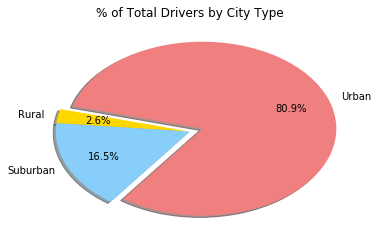

## Additional queries to understand the data

In [418]:
#which city and what city_type had the maximum fare
city_with_max_fare = df[df.fare == df['fare'].max()]
city_with_max_fare

,city,date,fare,ride_id,driver_count,type
2361,Randallchester,2018-02-19 03:52:47,58.55,8004803682564,9,Rural


In [419]:
#what were the other rides for that city with the maximum fare
df[df.city == city_with_max_fare.city.tolist()[0]]

,city,date,fare,ride_id,driver_count,type
2360,Randallchester,2018-04-13 11:13:31,43.22,1076079536213,9,Rural
2361,Randallchester,2018-02-19 03:52:47,58.55,8004803682564,9,Rural
2362,Randallchester,2018-02-11 05:42:29,25.78,9010611749008,9,Rural
2363,Randallchester,2018-03-25 13:36:46,10.37,3216382725494,9,Rural
2364,Randallchester,2018-04-07 23:42:07,10.79,1615474447641,9,Rural


In [420]:
#what's the average fare by city type
average_fare_by_city_type = df.groupby('type').agg({"fare": "mean"}).reset_index()
average_fare_by_city_type

,type,fare
0,Rural,34.623440
1,Suburban,30.970128
2,Urban,24.525772


In [437]:
#list the fares between the mean and the highest fare for the city_type with the highest fare
#average_fare_by_city_type[average_fare_by_city_type.type == city_with_max_fare.type.tolist()[0]]

df[(df.fare >= 34.62344) & (df.type == 'Rural')]

,city,date,fare,ride_id,driver_count,type
2251,South Jennifer,2018-03-07 19:10:13,48.79,9730627367446,7,Rural
2254,South Jennifer,2018-04-10 20:46:11,43.25,623928772332,7,Rural
2255,South Jennifer,2018-01-30 01:40:16,37.05,9545375482385,7,Rural
2256,South Jennifer,2018-03-11 00:51:24,49.82,1145342227278,7,Rural
2261,West Heather,2018-04-18 19:33:12,46.60,3671003215967,4,Rural
2263,West Heather,2018-03-06 20:06:51,48.11,2570548892682,4,Rural
2264,West Heather,2018-02-02 06:28:04,53.07,2462950442268,4,Rural
2265,West Heather,2018-05-07 19:22:15,44.94,4256853490277,4,Rural
2267,Newtonview,2018-02-05 22:53:21,45.02,7075366458478,1,Rural
2269,Newtonview,2018-04-25 10:20:13,55.84,9990581345298,1,Rural
